In [19]:
#Install the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
input_file = "../data/calcofi/bottle.csv"

In [46]:
def getDataFromCSV(filename):
    return pd.read_csv(filename)

In [47]:
data = getDataFromCSV(input_file)

/home/develop/anaconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [48]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data = data[:][:1000]
data = data[['T_degC', 'Salnty']]

In [50]:
data.columns = ['Temp', 'Salinity']

In [51]:
data.head()

,Temp,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [52]:
data.fillna(method='ffill', inplace=True)

In [53]:
X = np.array(data['Salinity']).reshape(-1, 1)
y = np.array(data['Temp']).reshape(-1, 1)

data.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.7418798356091422


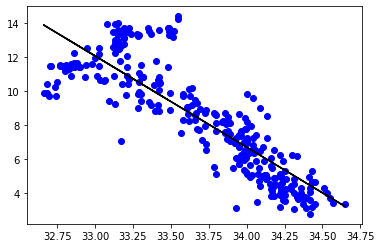

In [55]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.show()